In [1]:
import sys
from os.path import join, abspath
from glob import glob
import numpy as np
import vaex
from tqdm import tqdm
import matplotlib.pyplot as plt
from time import time
from scipy.stats import norm, skewnorm

In [2]:
# import utils
root_dir = abspath(join('..'))
root_dir

'/home2/s20321005/Thesis-Project'

In [3]:
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/6_Analisis',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [4]:
from utils import style, hdi, find_max, load_spectral_types

In [5]:
sp = load_spectral_types()
sp

,SpT,M_J,J-H,H-Ks,J-K
0,O9V,-3.44,-0.164,-0.071,-0.235
1,O9.5V,-3.30,-0.161,-0.069,-0.230
2,B0V,-3.17,-0.159,-0.067,-0.226
3,B0.5V,-2.80,-0.153,-0.063,-0.216
4,B1V,-2.33,-0.148,-0.059,-0.207
...,...,...,...,...,...
95,T6V,15.34,0.100,-0.030,0.070
96,T7V,15.83,0.000,0.000,0.000
97,T7.5V,16.61,0.200,-0.050,0.150
98,T8V,17.30,0.200,-0.050,0.150


In [6]:
style(name="seaborn-notebook")

In [7]:
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [8]:
data_baryon_dir = join(root_data_dir, "Baryon")
# load baryons components
df_baryon = vaex.open(join(data_baryon_dir, "baryon.hdf5"))
rhos = df_baryon["rho"].to_numpy()  # Msun/pc^3
sigmaz = df_baryon["sigma_z"].to_numpy() # km/s

e_rhos = df_baryon["e_rho"].to_numpy()  # Msun/pc^3
e_sigmaz = df_baryon["e_sigma_z"].to_numpy() # km/s
dpi=100

In [9]:
eff_vol = glob(join(root_data_dir, 'Effective-Volume-no', "z*"))
eff_vol.sort()
eff_vol

['/home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(-0.10)_(0.10).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.10)_(0.16).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.16)_(0.20).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.20)_(0.23).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.23)_(0.26).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.26)_(0.28).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.28)_(0.30).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.30)_(0.32).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.32)_(0.34).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.34)_(0.36).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.36)_(0.37).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume-no/z_(0.37)_(0.39).hdf5',
 '/home2/s20321

In [35]:
import re
c1, c2 = [], []
# get the value between () of the file name
for f in eff_vol:
    c1.append(float(re.findall(r'\((.*?)\)', f)[0]))
    c2.append(float(re.findall(r'\((.*?)\)', f)[1]))
c1 = np.array(c1)
c2 = np.array(c2)
color = 0.5*(c1+c2)
color

array([0.   , 0.13 , 0.18 , 0.215, 0.245, 0.27 , 0.29 , 0.31 , 0.33 ,
       0.35 , 0.365, 0.38 , 0.395])

In [11]:
mcmc_dm_dir = join(root_data_dir, "MCMC-no", "dddm", "data")
mcmc_dm_dir

'/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data'

In [12]:
dm_2_files = glob(join(mcmc_dm_dir, "chain-2-*"))
dm_2_files.sort()
dm_2_files

['/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-2-00.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-2-01.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-2-02.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-2-03.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-2-04.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-2-05.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-2-06.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-2-07.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-2-08.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-2-09.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-2-10.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-2-11.npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-2-12.npy']

## tes

In [13]:
index = 1
df = np.load(join(mcmc_dm_dir, f"chain-2-{index:02d}.npy"))
df.shape

(20000, 72, 35)

In [14]:
rhob = df[:, :, :12]
rhob = rhob.reshape(-1, 12)
rhob = rhob.sum(axis=1)/1E-2
rhoDM = df[:, :, 24].reshape(-1)/1E-2
sigmaDD = df[:, :, 25].reshape(-1)
log_hDD = df[:, :, 26].reshape(-1)
rhoD = rhoDM + sigmaDD/(4*np.exp(log_hDD))/1E-2
length = len(rhob)
rhob0 = np.empty((length, 12))
for i in range(12):
    rhob0[:,i] = norm.rvs(loc=rhos[i], scale=e_rhos[i], size=length)
rhob0 = rhob0.sum(axis=1)/1E-2

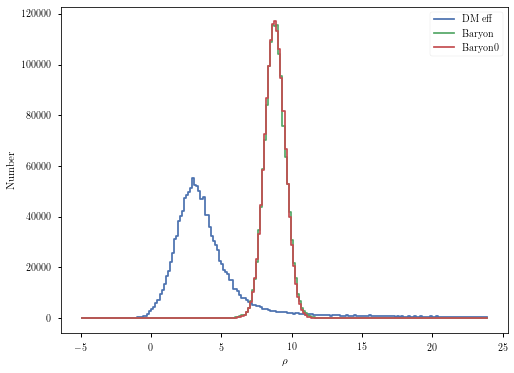

In [15]:
rho = np.linspace(-5, 24, 200)
rhoD_num, _ = np.histogram(rhoD, bins=rho)
rhob_num, _ = np.histogram(rhob, bins=rho)
rhob0_num, _ = np.histogram(rhob0, bins=rho)
rhomid = 0.5*(rho[1:] + rho[:-1])
# plot step
fig, ax = plt.subplots(figsize=(8, 6))
ax.step(rhomid, rhoD_num, label='DM eff')
ax.step(rhomid, rhob_num, label='Baryon')
ax.step(rhomid, rhob0_num, label='Baryon0')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel('Number')
ax.legend()
plt.show()

<ipython-input-16-53f415e35350>:11: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-b*(x-c)**2)


array([1.33547293e+04, 6.40848897e-01, 1.82646098e+00])

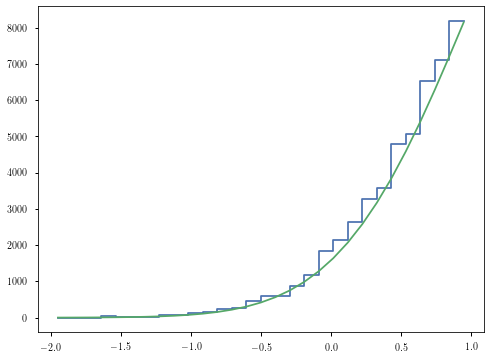

In [16]:
x1 = 1
mask = (rhoD < x1)

rhoD_mask = rhoD[mask]
# plot
rho = np.linspace(-2, x1, 30)
rhomid = 0.5*(rho[1:] + rho[:-1])
rhoD_num_mask, _ = np.histogram(rhoD_mask, bins=rho)

def exp(x, a, b, c):
    return a*np.exp(-b*(x-c)**2)

from scipy.optimize import curve_fit

p0 = [2000, 2, 1.5]
a_popt, pcov = curve_fit(exp, rhomid, rhoD_num_mask, p0=p0)
# popt = p0
fig, ax = plt.subplots(figsize=(8, 6))
ax.step(rhomid, rhoD_num_mask, label='DM')
ax.plot(rhomid, exp(rhomid, *a_popt), label='fit')
a_popt

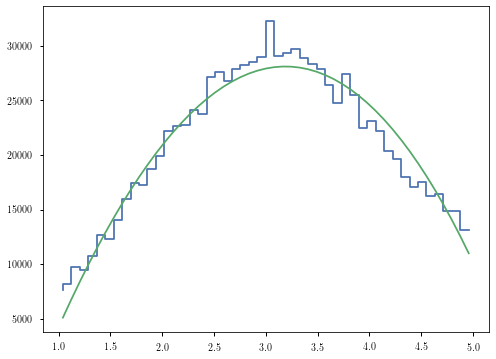

In [17]:
x2 = 5

mask = (rhoD < x2)*(rhoD > x1)

rhoD_mask = rhoD[mask]
# plot
rho = np.linspace(x1, x2, 50)
rhomid = 0.5*(rho[1:] + rho[:-1])
rhoD_num_mask, _ = np.histogram(rhoD_mask, bins=rho)

def poly(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

from scipy.optimize import curve_fit

b_popt, pcov = curve_fit(poly, rhomid, rhoD_num_mask)

fig, ax = plt.subplots(figsize=(8, 6))
ax.step(rhomid, rhoD_num_mask, label='DM')
ax.plot(rhomid, poly(rhomid, *b_popt), label='fit')

array([1.98734826e+06, 1.10688776e+00, 1.74926206e+00, 2.75758064e+00])

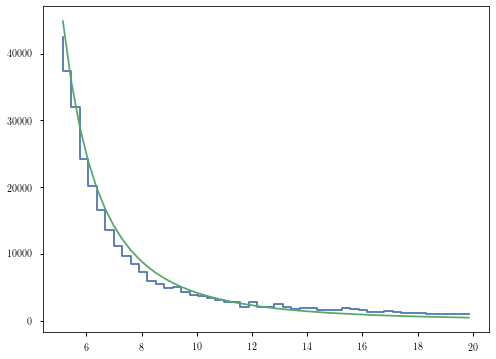

In [18]:
mask = rhoD > x2
rhoD_mask = rhoD[mask]

# plot
rho = np.linspace(x2, 20, 50)
rhomid = 0.5*(rho[1:] + rho[:-1])
rhoD_num_mask, _ = np.histogram(rhoD_mask, bins=rho)

def reci(x, a, b, c, d):
    return a/np.abs(b*x-c)**d

from scipy.optimize import curve_fit

p0 = [400000, 5, 1, 1]
c_popt, pcov = curve_fit(reci, rhomid, rhoD_num_mask, p0=p0)
# popt = p0

fig, ax = plt.subplots(figsize=(8, 6))
ax.step(rhomid, rhoD_num_mask, label='DM')
ax.plot(rhomid, reci(rhomid, *c_popt), label='fit')
c_popt

# combine all three functions above

\begin{align*}
    f_1(x) &= a_1 \exp{\left[-a_2 (x-a_3)^2\right]}  & \textup{ for } x < x_1\\
    f_2(x) &= b_1x^3 + b_2x^2 + b_3x + b_4 & \textup{ for } x_1 < x < x_2\\
    f_3(x) &= \frac{a_4}{(a_5x-a_6)^{a_7}} & \textup{ for } x > x_2\\
\end{align*}


*boundary conditions*
x_1 and x_2 are the boundaries of the interval of interest.

\begin{align*}
    f_1(x_1) &= b_1x_1^3 + b_2x_1^2 + b_3x_1 + b_4 \\
    f_3(x_2) &= b_1x_2^3 + b_2x_2^2 + b_3x_2 + b_4 \\
    f_1'(x_1) &= 3b_1x_1^2 + 2b_2x_1 + b_3 \\
    f_3'(x_2) &= 3b_1x_2^2 + 2b_2x_2 + b_3 \\
\end{align*}

or written in matrix form
\begin{align*}
    \begin{bmatrix}
    f_1(x_1) \\
    f_3(x_2) \\
    f_1'(x_1)\\
    f_3'(x_2)
    \end{bmatrix} &= \begin{bmatrix}
    x_1^3 & x_1^2 & x_1 & 1 \\
    x_2^3 & x_2^2 & x_2 & 1 \\
    3x_1^2 & 2x_1 & 1 & 0 \\
    3x_2^2 & 2x_2 & 1 & 0 \\
    \end{bmatrix}\begin{bmatrix}
    b_1 \\
    b_2 \\
    b_3 \\
    b_4
    \end{bmatrix} \\
    \begin{bmatrix}
    x_1^3 & x_1^2 & x_1 & 1 \\
    x_2^3 & x_2^2 & x_2 & 1 \\
    3x_1^2 & 2x_1 & 1 & 0 \\
    3x_2^2 & 2x_2 & 1 & 0 \\
    \end{bmatrix}^{-1}
    \begin{bmatrix}
    f_1(x_1) \\
    f_3(x_2) \\
    f_1'(x_1)\\
    f_3'(x_2)
    \end{bmatrix} &= \begin{bmatrix}
    b_1 \\
    b_2 \\
    b_3 \\
    b_4
    \end{bmatrix} \\
\end{align*}

In [19]:
def first_func(x, a0, a1, a2):
    return np.abs(a0)*np.exp(-a1*(x-a2)**2)
def deriv_first_func(x, a0, a1, a2):
    return -2*np.abs(a0)*a1*(x-a2)*np.exp(-a1*(x-a2)**2)
def second_func(x, b0, b1, b2, b3):
    return b0*x**3 + b1*x**2 + b2*x + b3
def third_func(x, c0, c1, c2, c3):
    return np.abs(c0)/np.abs(c1*x-c2)**c3
def deriv_third_func(x, c0, c1, c2, c3):
    return -np.abs(c0)*c1*c3/(c1*x-c2)**(c3+1)


def get_rhoD(x, *args):
    a0, a1, a2, c0, c1, c2, c3, x1, x2 = args
    M = [[x1**3, x1**2, x1, 1],
         [x2**3, x2**2, x2, 1],
         [3*x1**2, 2*x1, 1, 0],
         [3*x2**2, 2*x2, 1, 0]]
    M_inv = np.linalg.inv(M)
    F = [first_func(x1, a0, a1, a2), third_func(x2, c0, c1, c2, c3), deriv_first_func(x1, a0, a1, a2), deriv_third_func(x2, c0, c1, c2, c3)]
    b = M_inv@F
    # print(b)
    first = first_func(x, a0, a1, a2)
    second = second_func(x, *b)
    third = third_func(x, c0, c1, c2, c3)
    # print(first, second, third)
    # print(x<x1, x<x2)
    return np.select([x < x1, x < x2], [first, second], default=third)

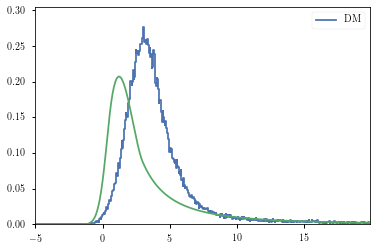

In [20]:
a = [0.2, 1.20076052, 1.]
c = [1.2,  0.620223479, -1.11414291,  2.40210560]
x1 = 0.5
x2 = 3
p0 = [*a, *c, x1, x2]
# rhox = np.linspace(-5, 20, 1000)
rho = np.arange(-5, 20, 0.05)
rhoD_num, _ = np.histogram(rhoD, bins=rho)
area = np.sum(rhoD_num*(rho[1:]-rho[:-1]))
rhoD_num = rhoD_num/area
rhoD_f = get_rhoD(rho, *p0)
rhomid = 0.5*(rho[:-1]+rho[1:])
mask = (rhomid > -5)*(rhomid < 20)
plt.step(rhomid[mask], rhoD_num[mask], label='DM')
plt.plot(rho, rhoD_f)
plt.ylim(0, np.max(rhoD_num[mask])*1.1 )
plt.xlim(rho.min(), rho.max())
# plt.xlim(, 20)
plt.legend()
plt.show()
# rhoD_f

In [21]:
rhoD_fit, _ = curve_fit(get_rhoD, rhomid, rhoD_num, p0=p0, maxfev = 5000)
rhoD_fit

<ipython-input-19-8fd836cd8ec6>:10: RuntimeWarning: invalid value encountered in double_scalars
  return -np.abs(c0)*c1*c3/(c1*x-c2)**(c3+1)


array([ 0.05194872,  0.94338538,  1.27778771,  3.53499534,  0.10431688,
       -0.97459278,  8.59457983,  0.55038804,  3.9346876 ])

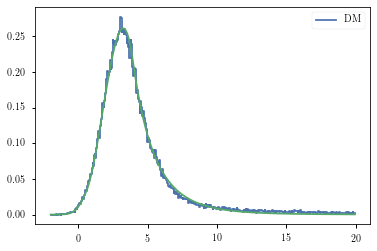

In [22]:
rho = np.arange(-2, 20, 0.05)
rhoD_num, _ = np.histogram(rhoD, bins=rho)
area = np.sum(rhoD_num*(rho[1:]-rho[:-1]))
rhoD_num = rhoD_num/area
rhoD_f = get_rhoD(rho, *rhoD_fit)
rhomid = 0.5*(rho[:-1]+rho[1:])
plt.step(rhomid, rhoD_num, label='DM')
plt.plot(rho, rhoD_f)
plt.legend()
plt.show()
# rhoD_f

In [23]:
(rhoD_f < 0).sum()

0

In [24]:
rhob_sample = np.random.choice(rhob, size=2000)
rhob_fit = skewnorm.fit(rhob_sample)
rhob0_sample = np.random.choice(rhob0, size=2000)
rhob0_fit = norm.fit(rhob0_sample)

((-0.718174405112433, 9.286952941198386, 0.8028793353624113),
 (8.870971407873613, 0.7189005983585088))

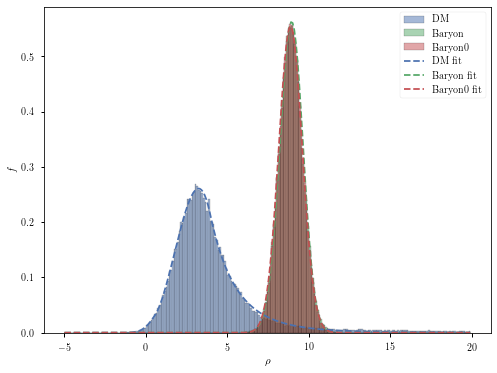

In [25]:
# plot
rho = np.arange(-5, 20, 0.1)
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(rhoD, bins=rho, density=True, label='DM', ec='k', alpha=0.5, color='C0')
ax.hist(rhob, bins=rho, density=True, label='Baryon', ec='k', alpha=0.5,color='C1')
ax.hist(rhob0, bins=rho, density=True, label='Baryon0', ec='k', alpha=0.5, color='C2')
ax.plot(rho, get_rhoD(rho, *rhoD_fit), label='DM fit', color='C0',  ls='--')
ax.plot(rho, skewnorm.pdf(rho, *rhob_fit), label='Baryon fit', color='C1', ls='--')
ax.plot(rho, norm.pdf(rho, *rhob0_fit), label='Baryon0 fit', color='C2', ls='--')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$f$')
ax.legend()
rhob_fit, rhob0_fit

rhoDM = 3.23 +1.69/-1.69
rhob = 8.94 +0.71/-0.72
rhob0 = 8.87 +0.72/-0.73


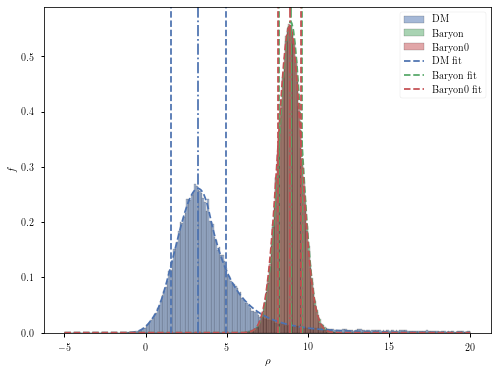

In [26]:
rhoD_low, rhoD_high = hdi(lambda x: get_rhoD(x, *rhoD_fit), perc=0.68, res=1E3, min=-2, max=50)
rhoD_mode = find_max(lambda x: get_rhoD(x, *rhoD_fit), x0=0.0)[0]

rhob_low, rhob_high = hdi(lambda x: skewnorm.pdf(x, *rhob_fit), perc=0.68, res=1E3, min=-5, max=14)
rhob_mode = find_max(lambda x: skewnorm.pdf(x, *rhob_fit), x0=0.0)[0]

rhob0_low, rhob0_high = hdi(lambda x: norm.pdf(x, *rhob0_fit), perc=0.68, res=1E3, min=-5, max=14)
rhob0_mode = find_max(lambda x: norm.pdf(x, *rhob0_fit), x0=0.0)[0]

# plot
rho = np.arange(-5, 20.1, 0.1)
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(rhoD, bins=rho, density=True, label='DM', ec='k', alpha=0.5, color='C0')
ax.hist(rhob, bins=rho, density=True, label='Baryon', ec='k', alpha=0.5,color='C1')
ax.hist(rhob0, bins=rho, density=True, label='Baryon0', ec='k', alpha=0.5, color='C2')
ax.plot(rho, get_rhoD(rho, *rhoD_fit), label='DM fit', color='C0',  ls='--')
ax.plot(rho, skewnorm.pdf(rho, *rhob_fit), label='Baryon fit', color='C1', ls='--')
ax.plot(rho, norm.pdf(rho, *rhob0_fit), label='Baryon0 fit', color='C2', ls='--')
ax.axvline(rhoD_mode, color='C0', ls='-.')
ax.axvline(rhob_mode, color='C1', ls='-.')
ax.axvline(rhob0_mode, color='C2', ls='-.')
ax.axvline(rhoD_low, color='C0', ls='--')
ax.axvline(rhoD_high, color='C0', ls='--')
ax.axvline(rhob_low, color='C1', ls='--')
ax.axvline(rhob_high, color='C1', ls='--')
ax.axvline(rhob0_low, color='C2', ls='--')
ax.axvline(rhob0_high, color='C2', ls='--')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$f$')
ax.legend()
print(f'rhoDM = {rhoD_mode:.02f} +{rhoD_high-rhoD_mode:.02f}/-{rhoD_mode-rhoD_low:.02f}')
print(f'rhob = {rhob_mode:.02f} +{rhob_high-rhob_mode:.02f}/-{rhob_mode-rhob_low:.02f}')
print(f'rhob0 = {rhob0_mode:.02f} +{rhob0_high-rhob0_mode:.02f}/-{rhob0_mode-rhob0_low:.02f}')

rhob0 = 8.89 +0.71/-0.71


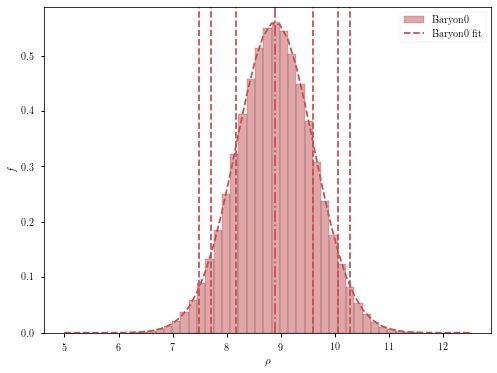

In [27]:
length = len(rhob)
rhob0 = np.empty((length, 12))
for i in range(12):
    rhob0[:,i] = norm.rvs(loc=rhos[i], scale=e_rhos[i], size=length)
rhob0 = rhob0.sum(axis=1)/1E-2
# fit with gaussian
rhob0_fit = norm.fit(rhob0)
# mode
rhob0_mode = find_max(lambda x: norm.pdf(x, *rhob0_fit), x0=0.0)[0]
# find 
sigma_1 = 68/100
sigma_2 = 90/100
sigma_3 = 95/100
rhob0_low = {}
rhob0_high = {}
for i, sigma in enumerate([sigma_1, sigma_2, sigma_3]):
    low, high = hdi(lambda x: norm.pdf(x, *rhob0_fit), perc=sigma, res=1E3, min=5, max=13)
    rhob0_low[i] = low
    rhob0_high[i] = high
# plot
rho = np.linspace(5, 12.5, 50)
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(rhob0, bins=rho, density=True, label='Baryon0', ec='k', alpha=0.5, color='C2')
ax.plot(rho, norm.pdf(rho, *rhob0_fit), label='Baryon0 fit', color='C2', ls='--')
ax.axvline(rhob0_mode, color='C2', ls='-.')
for i in range(3):
    ax.axvline(rhob0_low[i], color='C2', ls='--')
    ax.axvline(rhob0_high[i], color='C2', ls='--')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$f$')
ax.legend()
print(f'rhob0 = {rhob0_mode:.02f} +{rhob0_high[0]-rhob0_mode:.02f}/-{rhob0_mode-rhob0_low[0]:.02f}')

  0%|          | 0/13 [00:00<?, ?it/s]

0
fitting...
1436043


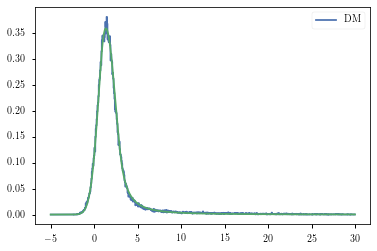

calculating HDI...


  8%|▊         | 1/13 [00:06<01:21,  6.78s/it]

calculating mode
1
fitting...
1412529


<ipython-input-19-8fd836cd8ec6>:10: RuntimeWarning: invalid value encountered in double_scalars
  return -np.abs(c0)*c1*c3/(c1*x-c2)**(c3+1)


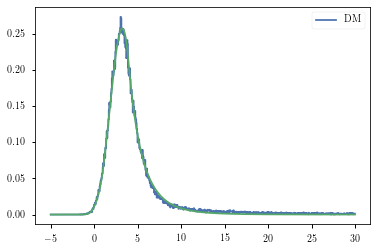

calculating HDI...


 15%|█▌        | 2/13 [00:13<01:16,  6.94s/it]

calculating mode
2
fitting...
1234470


<ipython-input-19-8fd836cd8ec6>:2: RuntimeWarning: overflow encountered in exp
  return np.abs(a0)*np.exp(-a1*(x-a2)**2)
<ipython-input-19-8fd836cd8ec6>:4: RuntimeWarning: overflow encountered in exp
  return -2*np.abs(a0)*a1*(x-a2)*np.exp(-a1*(x-a2)**2)
<ipython-input-19-8fd836cd8ec6>:21: RuntimeWarning: invalid value encountered in matmul
  b = M_inv@F
<ipython-input-19-8fd836cd8ec6>:6: RuntimeWarning: invalid value encountered in add
  return b0*x**3 + b1*x**2 + b2*x + b3
<ipython-input-19-8fd836cd8ec6>:2: RuntimeWarning: overflow encountered in multiply
  return np.abs(a0)*np.exp(-a1*(x-a2)**2)


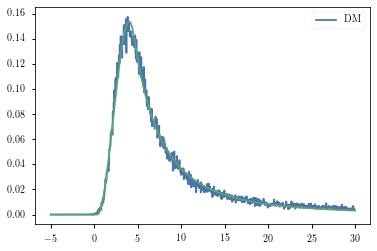

calculating HDI...


 23%|██▎       | 3/13 [00:19<01:02,  6.25s/it]

calculating mode
3
fitting...
1293647


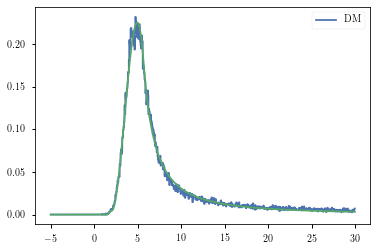

calculating HDI...


 31%|███       | 4/13 [00:24<00:52,  5.87s/it]

calculating mode
4
fitting...
1287862


<ipython-input-19-8fd836cd8ec6>:8: RuntimeWarning: overflow encountered in double_scalars
  return np.abs(c0)/np.abs(c1*x-c2)**c3
<ipython-input-19-8fd836cd8ec6>:10: RuntimeWarning: overflow encountered in double_scalars
  return -np.abs(c0)*c1*c3/(c1*x-c2)**(c3+1)
<ipython-input-19-8fd836cd8ec6>:8: RuntimeWarning: overflow encountered in power
  return np.abs(c0)/np.abs(c1*x-c2)**c3
<ipython-input-19-8fd836cd8ec6>:8: RuntimeWarning: divide by zero encountered in double_scalars
  return np.abs(c0)/np.abs(c1*x-c2)**c3
<ipython-input-19-8fd836cd8ec6>:10: RuntimeWarning: divide by zero encountered in double_scalars
  return -np.abs(c0)*c1*c3/(c1*x-c2)**(c3+1)
<ipython-input-19-8fd836cd8ec6>:8: RuntimeWarning: divide by zero encountered in divide
  return np.abs(c0)/np.abs(c1*x-c2)**c3
<ipython-input-19-8fd836cd8ec6>:8: RuntimeWarning: overflow encountered in divide
  return np.abs(c0)/np.abs(c1*x-c2)**c3
/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages/scipy/optimize/_minpack

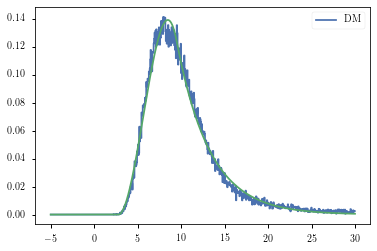

calculating HDI...


 38%|███▊      | 5/13 [00:29<00:44,  5.61s/it]

calculating mode
5
fitting...
841323


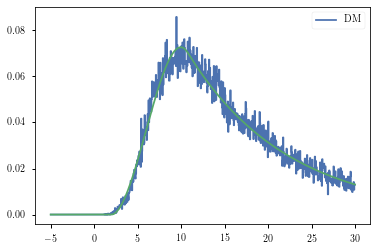

calculating HDI...


 46%|████▌     | 6/13 [00:34<00:38,  5.43s/it]

calculating mode
6
fitting...
461373


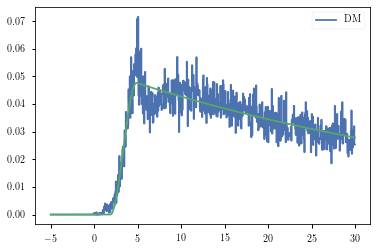

calculating HDI...


 54%|█████▍    | 7/13 [00:40<00:32,  5.47s/it]

calculating mode
7
fitting...
1230917


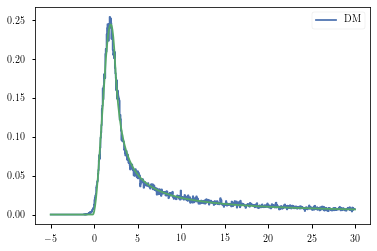

calculating HDI...


 62%|██████▏   | 8/13 [00:46<00:29,  5.85s/it]

calculating mode
8
fitting...
1169964


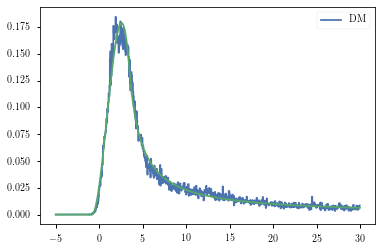

calculating HDI...


 69%|██████▉   | 9/13 [00:52<00:23,  5.84s/it]

calculating mode
9
fitting...
899080


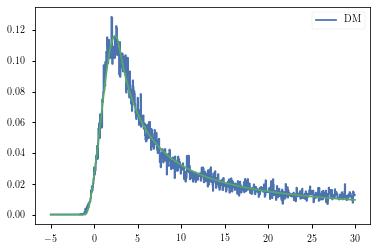

calculating HDI...


 77%|███████▋  | 10/13 [00:58<00:17,  5.68s/it]

calculating mode
10
fitting...
1168006


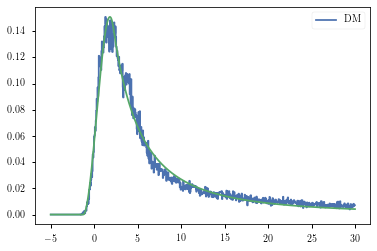

calculating HDI...


 85%|████████▍ | 11/13 [01:04<00:11,  5.79s/it]

calculating mode
11
fitting...
820042


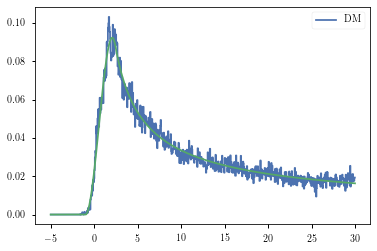

calculating HDI...


 92%|█████████▏| 12/13 [01:10<00:05,  5.87s/it]

calculating mode
12
fitting...
1277519


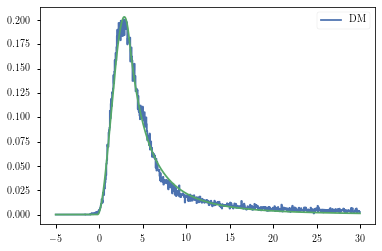

calculating HDI...


100%|██████████| 13/13 [01:16<00:00,  5.87s/it]

calculating mode


In [246]:
from tqdm import tqdm

rhoD_modes = []
rhoD_errs = []
rhob_modes = []
rhob_errs = []
rhoD_fits = []

rho_edge = np.arange(-5, 30, 0.05)
rhomid = 0.5*(rho_edge[1:] + rho_edge[:-1])

p0s = [[ 3.85611504e-001,  5.55354881e-001,  1.48646569e+000,
         2.75678368e-001,  9.23699848e-001,  1.28177927e+000,
         2.12629867e+000,  8.41476416e-001,  3.13693583e+000],
       [ 5.08318078e-002,  9.45786289e-001,  1.27324852e+000,
         3.00126170e+000,  1.15978510e-001, -9.43122772e-001,
         7.88232769e+000,  5.45637250e-001,  3.94139078e+000],
       [ 1.51887621e-001,  2.26899758e+000,  3.34137425e+000,
         1.27181674e+000,  2.56914585e-001, -1.03853055e+000,
         2.76579229e+000,  3.62165388e-001,  4.57014214e+000],
       [ 4.82180241e-003,  1.37353066e+001,  1.95520004e+000,
         3.36674571e-001,  6.86305632e-001,  2.40608586e+000,
         1.60446851e+000,  1.99044206e+000,  5.65033048e+000],
       [ 5.33361295e-301,  4.02136296e+000,  5.81241898e+000,
         9.11530448e-001,  5.23406587e-005, -9.99900388e-001,
         5.03344329e+003,  2.78245372e+000,  9.50648834e+000],
       [-1.42079235e-132,  3.42946018e+000,  5.27770629e+000,
         3.97508163e-001,  2.92460497e-005, -1.00026386e+000,
         2.99727522e+003,  1.95795831e+000,  1.07543777e+001],
       [ 3.04468825e-106,  3.40449776e+000,  5.27049270e+000,
         2.19382468e-001,  1.18156338e-005, -1.00078427e+000,
         1.81445556e+003,  1.86383321e+000,  4.88164515e+000],
       [ 1.03284706e-048,  3.38832893e+000,  5.26415587e+000,
        -3.02054623e-002,  1.66039689e-001,  2.49412074e-001,
         9.81121844e-001, -1.59621841e-001,  2.40132447e+000],
       [ 8.14320951e-054,  3.38904398e+000,  5.26454878e+000,
         2.09314010e-002,  1.14688838e-001,  2.34263306e-001,
         1.03178658e+000, -8.26384773e-001,  3.44616078e+000],
       [ 2.27933714e-031,  1.42134485e+006, -2.77162452e+006,
         3.85084791e-002,  1.05506974e-001, -1.07857103e-001,
         1.17705054e+000, -1.05381126e+000,  2.90011744e+000],
       [-2.62545114e-023,  5.66202624e+012,  1.52016223e+014,
         5.55672969e-002,  9.77474978e-002, -4.28061375e-001,
         2.13825958e+000, -1.25577690e+000,  2.22380158e+000],
       [-1.53038423e-033,  3.36156576e+004,  3.24310306e+004,
         5.35172049e-002,  2.11973019e-001,  5.50267827e-002,
         6.45741573e-001, -9.87583455e-001,  2.45799632e+000],
       [-7.62764087e-017,  6.85023092e+020, -2.66651752e+019,
         7.23815391e-002,  1.09454717e-001, -3.70684101e-001,
         3.14990225e+000, -1.90244180e-001,  3.43952637e+000]]

for index, p0 in zip(tqdm(range(len(dm_2_files))), p0s):
    # if index < 1:
    #     continue
    df = np.load(dm_2_files[index])
    print(index)
    rhob = df[:, :, :12]
    rhob = rhob.reshape(-1, 12)
    rhob = rhob.sum(axis=1)/1E-2
    rhoDM = df[:, :, 24].reshape(-1)/1E-2
    sigmaDD = df[:, :, 25].reshape(-1)
    log_hDD = df[:, :, 26].reshape(-1)
    rhoD = rhoDM + sigmaDD/(4*np.exp(log_hDD))/1E-2
    print("fitting...")
    rhoD_num, _ = np.histogram(rhoD, bins=rho_edge)
    print(np.sum(rhoD_num))
    area = np.sum(rhoD_num*(rho_edge[1:]-rho_edge[:-1]))
    rhoD_num = rhoD_num/area
    # print(rhomid[250:255], rhoD_num[250:255])
    rhoD_fit, _ = curve_fit(get_rhoD, rhomid, rhoD_num, p0=p0, maxfev=100_000)
    # rhoD_fit = p0
    rhoD_f = get_rhoD(rho_edge, *rhoD_fit)
    plt.step(rhomid, rhoD_num, label='DM')
    plt.plot(rho_edge, rhoD_f)
    plt.legend()
    plt.show()
    # break
    rhoD_fits.append(rhoD_fit)
    rhob_sample = np.random.choice(rhob, size=2000, replace=False)
    rhob_fit = skewnorm.fit(rhob_sample)
    print("calculating HDI...")
    rhoD_low = {}
    rhoD_high = {}
    rhob_low = {}
    rhob_high = {}
    for i, sigma in enumerate([sigma_1, sigma_2, sigma_3]):
        low, high = hdi(lambda x: get_rhoD(x, *rhoD_fit), perc=sigma, res=1E3, min=-5, max=30)
        rhoD_low[i] = low
        rhoD_high[i] = high
        low, high = hdi(lambda x: skewnorm.pdf(x, *rhob_fit), perc=sigma, res=1E3, min=0, max=13)
        rhob_low[i] = low
        rhob_high[i] = high
    print("calculating mode")
    rhoD_mode = find_max(lambda x: get_rhoD(x, *rhoD_fit), x0=10.0)[0]
    rhoD_modes.append(rhoD_mode)
    rhoD_errs.append({'low': rhoD_low, 'high': rhoD_high})
    rhob_modes.append(rhob_mode)
    rhob_errs.append({'low': rhob_low, 'high': rhob_high})
    v = get_rhoD(rho_edge, *rhoD_fit)
    if np.sum(v) < 0:
        raise ValueError(f"negative value at {index}")
    # break
    

In [237]:
np.array(rhoD_fits)

array([[ 3.85611504e-001,  5.55354881e-001,  1.48646569e+000,
         2.75678368e-001,  9.23699848e-001,  1.28177927e+000,
         2.12629867e+000,  8.41476416e-001,  3.13693583e+000],
       [ 5.08300288e-002,  9.45817776e-001,  1.27321125e+000,
         2.99987853e+000,  1.15959302e-001, -9.43081840e-001,
         7.88291423e+000,  5.45633238e-001,  3.94138435e+000],
       [ 1.51887621e-001,  2.26899758e+000,  3.34137425e+000,
         1.27181674e+000,  2.56914585e-001, -1.03853055e+000,
         2.76579229e+000,  3.62165388e-001,  4.57014214e+000],
       [ 4.82175631e-003,  1.37455761e+001,  1.95508719e+000,
         3.35976425e-001,  6.85419966e-001,  2.40298418e+000,
         1.60446676e+000,  1.99037577e+000,  5.65033229e+000],
       [ 5.33361295e-301,  4.04005076e+000,  5.91239375e+000,
         8.97890002e-001,  4.92914596e-005, -9.99903381e-001,
         5.34458887e+003,  2.78246896e+000,  9.50645075e+000],
       [-1.42079235e-132,  3.42946018e+000,  5.27770629e+000,
   

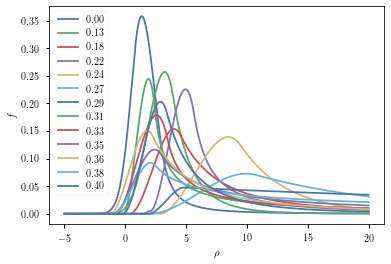

In [247]:
rhox = np.linspace(-5, 20, 1000)
for c, p in zip(color, rhoD_fits):
    plt.plot(rhox, get_rhoD(rhox, *p), label=f"{c:.2f}")
plt.legend()
plt.xlabel(r'$\rho$')
plt.ylabel(r'$f$')
plt.savefig(join("img", "rhoD-individual.pdf"), dpi=70)
plt.show()

In [296]:
# df = np.load(dm_2_files[3])
# rhob = df[:, :, :12]
# rhob = rhob.reshape(-1, 12)
# rhob = rhob.sum(axis=1)/1E-2
# rhoDM = df[:, :, 24].reshape(-1)/1E-2
# sigmaDD = df[:, :, 25].reshape(-1)
# log_hDD = df[:, :, 26].reshape(-1)
# rhoD = rhoDM + sigmaDD/(4*np.exp(log_hDD))/1E-2
# print("fitting...")
# rhoD_num, _ = np.histogram(rhoD, bins=rho_edge)
# rhoD_fit = splrep(rhomid, rhoD_num, s=50)
# rhox = np.linspace(-5, 18, 1000)
# area = simps(BSpline(*rhoD_fit)(integrate), integrate)
# plt.step(rhomid, rhoD_num, label='DM')
# plt.plot(rhox, BSpline(*rhoD_fit)(rhox), label='fit')
# plt.legend()
# plt.show()
# # rhoD_fits.append({'area': area, 'fit': rhoD_fit})
# # rhob_sample = np.random.choice(rhob, size=2000, replace=False)
# # rhob_fit = skewnorm.fit(rhob_sample)
# # print("calculating HDI...")
# # rhoD_low = {}
# # rhoD_high = {}
# # rhob_low = {}
# # rhob_high = {}
# # for i, sigma in enumerate([sigma_1, sigma_2, sigma_3]):
# #     low, high = hdi(lambda x: get_rhoD(x, area, rhoD_fit), perc=0.68, res=1E3, min=-5, max=14)
# #     rhoD_low[i] = low
# #     rhoD_high[i] = high
# #     low, high = hdi(lambda x: skewnorm.pdf(x, *rhob_fit), perc=sigma, res=1E3, min=5, max=13)
# #     rhob_low[i] = low
# #     rhob_high[i] = high
# # print("calculating mode")
# # rhoD_mode = find_max(lambda x: get_rhoD(x, area, rhoD_fit), x0=0.0)[0]
# # rhob_mode = find_max(lambda x: skewnorm.pdf(x, *rhob_fit), x0=0.0)[0]
# # # rhoD_modes.append(rhoD_mode)
# # # rhoD_errs.append({'low': rhoD_low, 'high': rhoD_high})
# # # rhob_modes.append(rhob_mode)
# # # rhob_errs.append({'low': rhob_low, 'high': rhob_high})

<ipython-input-249-87270a60a992>:8: RuntimeWarning: divide by zero encountered in log
  log_rhoD += np.log(np.abs(get_rhoD(rho, *p)))


(2.0, 8.0)

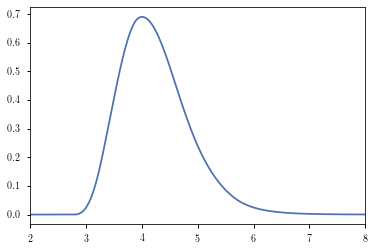

In [249]:
# multiplying the rhoDM, but it became addition in log
rho = np.linspace(-5, 50, 10000)
log_rhoD = None
for p in rhoD_fits:
    if log_rhoD is None:
        log_rhoD = np.log(np.abs(get_rhoD(rho, *p)))
    else:
        log_rhoD += np.log(np.abs(get_rhoD(rho, *p)))
# turn into rhoDM
rhoD_com = np.exp(log_rhoD)
# find area
area = np.trapz(rhoD_com, rho)
# normalize
rhoD_com /= area
# plot
fig, ax = plt.subplots()
ax.plot(rho, rhoD_com, label='rhoDM')
ax.set_xlim(2,8)

In [250]:
rhoD_com_fit, _ = curve_fit(skewnorm.pdf, rho, rhoD_com, p0=[4, 2, 1], maxfev=5_000)
rhoD_com_fit

array([2.59424868, 3.54303254, 0.908315  ])

(0.0, 8.0)

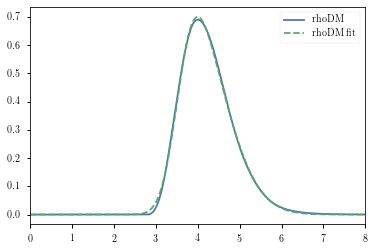

In [251]:
plt.plot(rho, rhoD_com, label='rhoDM')
plt.plot(rho, skewnorm.pdf(rho, *rhoD_com_fit), label='rhoDM fit', ls='--')
plt.legend()
plt.xlim(0,8)

In [252]:
rhoD_com_low = {}
rhoD_com_high = {}
for i, sigma in enumerate([sigma_1, sigma_2, sigma_3]):
    low, high = hdi(lambda x: skewnorm.pdf(x, *rhoD_com_fit), perc=sigma, res=1E3, min=0, max=12)
    rhoD_com_low[i] = low
    rhoD_com_high[i] = high
rhoD_com_mode = find_max(lambda x: skewnorm.pdf(x, *rhoD_com_fit), x0=0.0)[0]
rhoD_com_mode

3.995437500000005

In [253]:
rhoD_com_low, rhoD_com_high

({0: 3.5075075075075075, 1: 3.255255255255255, 2: 3.135135135135135},
 {0: 4.672672672672673, 1: 5.201201201201201, 2: 5.465465465465465})

In [254]:
A9 = sp[sp['SpT'] == 'A9V']['J-K'].values[0]
F0 = sp[sp['SpT'] == 'F0V']['J-K'].values[0]
b1 = (A9+F0)/2

F9 = sp[sp['SpT'] == 'F9V']['J-K'].values[0]
G0 = sp[sp['SpT'] == 'G0V']['J-K'].values[0]
b2 = (F9+G0)/2
b1, b2

(0.1355, 0.314)

In [255]:
color

array([0.   , 0.13 , 0.18 , 0.215, 0.245, 0.27 , 0.29 , 0.31 , 0.33 ,
       0.35 , 0.365, 0.38 , 0.395])

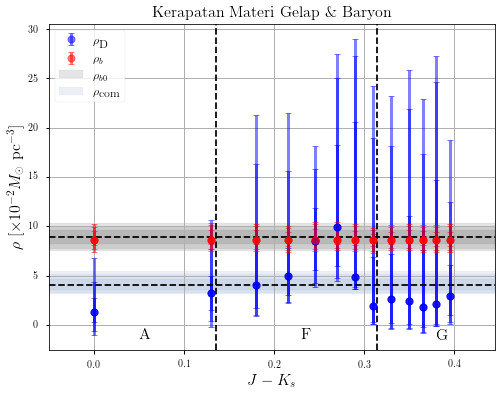

3.995437500000005

In [261]:
c = color
cs = np.linspace(c.min()-0.05, c.max()+0.05, 100)

fig, ax = plt.subplots(figsize=(8, 6))
ax.axhline(y=rhob0_mode, color='black', linestyle='--')
for i in range(3):
    low = np.array([err['low'][i] for err in rhoD_errs])
    high = np.array([err['high'][i] for err in rhoD_errs])
    dm_ax = ax.errorbar(c, rhoD_modes, yerr=[rhoD_modes-low, high-rhoD_modes], fmt='o', color='blue', capsize=3, alpha=0.5, elinewidth=3, markeredgewidth=1)
    low = np.array([err['low'][i] for err in rhob_errs])
    high = np.array([err['high'][i] for err in rhob_errs])
    rhob_ax = ax.errorbar(c, rhob_modes, yerr=[rhob_modes-low, high-rhob_modes], fmt='o', color='red', capsize=3, alpha=0.5, elinewidth=3, markeredgewidth=1)
    rhob0_ax = ax.fill_between(cs, rhob0_low[i], rhob0_high[i], color='black', alpha=0.1)
    rhoD_com_ax = ax.fill_between(cs, rhoD_com_low[i], rhoD_com_high[i], color='C0', alpha=0.1)
    if i == 2:
        ax.legend([dm_ax, rhob_ax, rhob0_ax, rhoD_com_ax], 
                  [r'$\rho_{\textup{D}}$', r'$\rho_{b}$', r'$\rho_{b0}$', r'$\rho_{\textup{com}}$'],
                  loc='best', fontsize=12)
# real value
ax.axhline(y=rhoD_com_mode, color='black', linestyle='--')
ax.axvline(x=b1, color='black', linestyle='--')
ax.axvline(x=b2, color='black', linestyle='--')
ax.text(0.05, -1.5, r'$\textup{A}$', fontsize=16)
ax.text(0.23, -1.5, r'$\textup{F}$', fontsize=16)
ax.text(0.38, -1.5, r'$\textup{G}$', fontsize=16)
ax.set_xlabel(r'$J-K_s$', fontsize=16)
ax.set_ylabel(r'$\rho$ [$\times 10^{-2}M_{\odot}\ $pc$^{-3}$]', fontsize=16)
ax.set_xlim(cs.min(), cs.max())
ax.set_title("Kerapatan Materi Gelap \& Baryon", fontsize=16)
ax.grid()
fig.savefig(join('img', 'rhoDM-dddm.pdf'), dpi=300)
plt.show()
rhoD_com_mode

In [235]:
rhoD_modes

[1.3495000000000013,
 3.2307500000000045,
 4.004562500000006,
 4.945625000000006,
 0.0,
 9.938812500000012,
 4.8501250000000065,
 1.9038125000000021,
 2.5760625000000026,
 2.4093750000000025,
 1.8058125000000023,
 2.072062500000002,
 2.888062500000003]